# 1. 파이썬을 이용한 TF-IDF 행렬 구현

In [2]:
!pip install pandas

  Using cached pytz-2024.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2024.2-py2.py3-none-any.whl.metadata (1.4 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.4/11.4 MB 71.8 MB/s eta 0:00:00
Using cached pytz-2024.2-py2.py3-none-any.whl (508 kB)
Using cached tzdata-2024.2-py2.py3-none-any.whl (346 kB)


In [3]:
import pandas as pd # 데이터프레임 사용을 위해
from math import log # IDF 계산을 위해

# 4개의 문서
docs = [
  '먹고 싶은 사과',
  '먹고 싶은 바나나',
  '길고 노란 바나나 바나나',
  '저는 과일이 좋아요'
] 

# vocab 구축
vocab = list(set(w for doc in docs for w in doc.split()))
vocab.sort()

In [ ]:
print(vocab)

In [6]:
# 총 문서의 수
N = len(docs)
print('총 문서의 수', N)

총 문서의 수 4


TF, IDF, 그리고 TF-IDF 값을 구하는 함수를 구현합니다.



In [4]:
# TF를 구하는 함수
def tf(t, d):
  return d.count(t)

# IDF를 구하는 함수
def idf(t):
  df = 0
  for doc in docs:
    df += t in doc
  return log(N/(df+1))

# TF와 IDF의 값을 곱하는 함수
def tfidf(t, d):
  return tf(t,d)* idf(t)

TF를 구해보겠습니다. 다시 말해 DTM을 데이터프레임에 저장하여 출력해보겠습니다.


In [8]:
result = []

# 각 문서에 대해서 아래 연산을 반복
for i in range(N):
  result.append([])
  d = docs[i]
  for j in range(len(vocab)):
    t = vocab[j]
    # tf 함수를 호출 : TF 값을 계산
    result[-1].append(tf(t, d))

tf_ = pd.DataFrame(result, columns = vocab)
tf_

,과일이,길고,노란,먹고,바나나,사과,싶은,저는,좋아요
0,0,0,0,1,0,1,1,0,0
1,0,0,0,1,1,0,1,0,0
2,0,1,1,0,2,0,0,0,0
3,1,0,0,0,0,0,0,1,1


In [9]:
result = []

# 각 단어에 대해서 idf값을 계산
for j in range(len(vocab)):
    t = vocab[j]
    # idf 함수를 호출 : IDF 값을 계산
    result.append(idf(t))

# IDF 출력
idf_ = pd.DataFrame(result, index=vocab, columns=["IDF"])
idf_

,IDF
과일이,0.693147
길고,0.693147
노란,0.693147
먹고,0.287682
바나나,0.287682
사과,0.693147
싶은,0.287682
저는,0.693147
좋아요,0.693147


In [10]:
result = []
for i in range(N):
  result.append([])
  d = docs[i]
  for j in range(len(vocab)):
    t = vocab[j]
    # tfidf 함수를 호출 : TF-IDF 값 계산
    result[-1].append(tfidf(t,d))

# TF-IDF 행렬
tfidf_ = pd.DataFrame(result, columns = vocab)
tfidf_

,과일이,길고,노란,먹고,바나나,사과,싶은,저는,좋아요
0,0.000000,0.000000,0.000000,0.287682,0.000000,0.693147,0.287682,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.287682,0.287682,0.000000,0.287682,0.000000,0.000000
2,0.000000,0.693147,0.693147,0.000000,0.575364,0.000000,0.000000,0.000000,0.000000
3,0.693147,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.693147,0.693147


TF-IDF의 가장 기본적인 식에 대해서 학습하고 실제로 구현하는 실습을 진행해보았습니다. 사실 실제 TF-IDF 구현을 제공하고 있는 많은 머신 러닝 패키지들은 패키지마다 식이 조금씩 상이하지만, 위에서 배운 식과는 다른 조정된 식을 사용합니다. 아래에서 실습할 사이킷런의 TF-IDF 구현체 또한 위의 식에서 조정된 식을 사용하고 있습니다.

## 1. 데이터 로드

In [ ]:
import pandas as pd
import numpy as np
import torch
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.datasets import fetch_20newsgroups
from sklearn.metrics import accuracy_score, precision_score,  recall_score, f1_score

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_20newsgroups.html

머신러닝 라이브러리 사이킷런에서는 Twenty Newsgroups이라고 불리는 20개의 다른 주제를 가진 뉴스그룹 데이터(일종의 전자 메일 데이터)를 제공합니다.

In [ ]:
# 'train'을 기재하면 훈련 데이터만 리턴.
newsdata = fetch_20newsgroups(subset = 'train')

위의 코드 부분에 subset 부분에 'all'을 넣으면 18,846개의 전체 데이터 다운로드할 수 있으며, 'train'을 넣으면 훈련 데이터를, 'test'를 넣으면 테스트 데이터를 다운로드할 수 있습니다. newsdata.keys()를 출력하여 해당 데이터가 어떤 속성으로 구성되어져 있는지 출력해보았습니다.

In [ ]:
print(newsdata.keys())

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])


해당 데이터는 data, filenames, target_names, target, DESCR, description이라는 6개 속성의 데이터를 갖고 있습니다. 이 중 데이터에 접근하려면 .data를 사용해야 합니다. 훈련에 사용할 뉴스그룹 데이터는 몇 개 일까요?



In [ ]:
print('훈련용 샘플의 개수 : {}'.format(len(newsdata.data)))

훈련용 샘플의 개수 : 11314


훈련용 샘플은 총 11,314개로 구성되어 있습니다. newsdata.target_names는 이 데이터의 20개의 카테고리의 이름을 담고있습니다. 어떤 카테고리들로 구성되어있는지 확인해보겠습니다.

In [ ]:
num_labels = len(newsdata.target_names)
print('총 주제의 개수 : {}'.format(num_labels))
print(newsdata.target_names)

총 주제의 개수 : 20
['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


target에는 총 0부터 19까지의 숫자가 들어가있는데 첫번째 샘플의 경우에는 몇 번 카테고리인지 확인해보겠습니다.



In [ ]:
print('첫번째 샘플의 레이블 : {}'.format(newsdata.target[0]))

첫번째 샘플의 레이블 : 7


첫번째 샘플은 카테고리 7번에 속한다고 라벨이 붙어있습니다. 첫번째 샘플이 어떤 내용을 갖고 있는지 확인해보겠습니다.

In [ ]:
print(newsdata.data[0]) # 첫번째 샘플 출력

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----







## 2. 데이터 탐색

보기 쉽도록 판다스의 데이터프레임으로 변환하고 상위 5개의 샘플을 출력해보겠습니다.

In [ ]:
data = pd.DataFrame(newsdata.data, columns = ['email'])
data['target'] = pd.Series(newsdata.target)
data[:5]

,email,target
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,7
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,4
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,1
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,14


In [ ]:
data['target'].value_counts()

10    600
15    599
8     598
9     597
11    595
7     594
13    594
5     593
14    593
2     591
12    591
3     590
6     585
1     584
4     578
17    564
16    546
0     480
18    465
19    377
Name: target, dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11314 entries, 0 to 11313
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   email   11314 non-null  object
 1   target  11314 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 176.9+ KB


데이터에서 가장 먼저 확인해야할 것은 결측값 여부입니다.

In [ ]:
print('결측값 여부 :', data.isnull().values.any())

결측값 여부 : False


결측값이 존재하지 않는다면 혹시 중복 샘플이 있진 않은지 확인합니다.

In [ ]:
print('중복을 제외한 샘플의 수 : {}'.format(data['email'].nunique()))
print('중복을 제외한 주제의 수 : {}'.format(data['target'].nunique()))

중복을 제외한 샘플의 수 : 11314
중복을 제외한 주제의 수 : 20


각 카테고리당 데이터의 개수를 확인하여 데이터의 개수가 균일한지 확인합니다.

<AxesSubplot:>

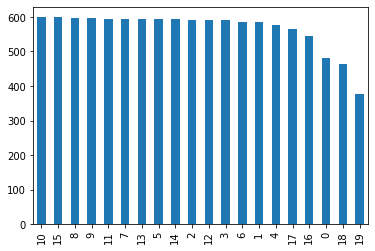

In [ ]:
data['target'].value_counts().plot(kind='bar')

In [ ]:
print(data.groupby('target').size().reset_index(name='count'))

    target  count
0        0    480
1        1    584
2        2    591
3        3    590
4        4    578
5        5    593
6        6    585
7        7    594
8        8    598
9        9    597
10      10    600
11      11    595
12      12    591
13      13    594
14      14    593
15      15    599
16      16    546
17      17    564
18      18    465
19      19    377


## 3. X 데이터와 y데이터의 분리

In [ ]:
newsdata_test = fetch_20newsgroups(subset='test', shuffle=True)
train_email = data['email']
train_label = data['target']
test_email = newsdata_test.data
test_label = newsdata_test.target

In [ ]:
print('e-mail 첫번째 샘플 출력 :')
print(train_email[0])
print('========================')
print('e-mail 첫번째 샘플 레이블 :')
print(train_label[0])

e-mail 첫번째 샘플 출력 :
From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----





e-mail 첫번째 샘플 레이블 :
7


## 4. TF-IDF를 위한 전처리

In [ ]:
vocab_size = 10000

In [ ]:
tfidf_vect = TfidfVectorizer(max_features=vocab_size)
train_tfidf_list = tfidf_vect.fit_transform(train_email).toarray().tolist()
test_tfidf_list = tfidf_vect.transform(test_email).toarray().tolist()

print('훈련 데이터의 TF-IDF 행렬의 크기(shape) :', np.shape(train_tfidf_list))
print('테스트 데이터의 TF-IDF 행렬의 크기(shape) :', np.shape(test_tfidf_list))

훈련 데이터의 TF-IDF 행렬의 크기(shape) : (11314, 10000)
테스트 데이터의 TF-IDF 행렬의 크기(shape) : (7532, 10000)


In [ ]:
train_tfidf_tensor = torch.tensor(train_tfidf_list)
train_label_tensor = torch.tensor(train_label)
test_tfidf_tensor = torch.tensor(test_tfidf_list)
test_label_tensor = torch.tensor(test_label)

훈련 데이터 : 11,314개의 행을 가진 TF-IDF 행렬과 11,314개의 레이블  
테스트 데이터 : 11,314개의 행을 가진 TF-IDF 행렬과 11,314개의 레이블

In [ ]:
print(train_tfidf_tensor.shape)
print(train_label_tensor.shape)
print(test_tfidf_tensor.shape)
print(test_label_tensor.shape)

torch.Size([11314, 10000])
torch.Size([11314])
torch.Size([7532, 10000])
torch.Size([7532])


## 5. 다층 퍼셉트론 설계

아래의 신경망은 tfidf_size의 뉴런 개수를 가지는 입력층, 1,400개의 뉴런을 가지는 은닉층, 다시 num_label의 뉴런 개수를 가지는 출력층을 가진 다층 퍼셉트론입니다.

nn.Linear(input_dim, output_dim) : 뉴런의 개수를 기재하므로서 층을 만듭니다. 각각 input_dim과 output_dim을 의미합니다.

In [ ]:
class Perceptron(torch.nn.Module):
  def __init__(self, tfidf_size, num_label):
    super(Perceptron, self).__init__()
    self.linear1 = torch.nn.Linear(tfidf_size, 1400)
    self.relu = torch.nn.ReLU()
    self.linear2 = torch.nn.Linear(1400, num_label)

  def forward(self, tfidf_input):
    hidden = self.linear1(tfidf_input)
    relu = self.relu(hidden)
    y_pred = self.linear2(relu)
    return y_pred

위와 같은 클래스를 사용한 모델 구현 형식은 대부분의 파이토치 구현체에서 사용하고 있는 방식으로 반드시 숙지할 필요가 있습니다.

클래스(class) 형태의 모델은 nn.Module 을 상속받습니다. 그리고 __init__()에서 모델의 구조와 동작을 정의하는 생성자를 정의합니다. 이는 파이썬에서 객체가 갖는 속성값을 초기화하는 역할로, 객체가 생성될 때 자동으호 호출됩니다. super() 함수를 부르면 여기서 만든 클래스는 nn.Module 클래스의 속성들을 가지고 초기화 됩니다. foward() 함수는 모델이 학습데이터를 입력받아서 forward 연산을 진행시키는 함수입니다. 이 forward() 함수는 model 객체를 데이터와 함께 호출하면 자동으로 실행이됩니다. 예를 들어 model이란 이름의 객체를 생성 후, model(입력 데이터)와 같은 형식으로 객체를 호출하면 자동으로 forward 연산이 수행됩니다.

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = Perceptron(tfidf_size=vocab_size, num_label=num_labels)
model.to(device)

Perceptron(
  (linear1): Linear(in_features=10000, out_features=1400, bias=True)
  (relu): ReLU()
  (linear2): Linear(in_features=1400, out_features=20, bias=True)
)

## 6. 손실 함수

손실 함수는 파이토치에서 제공하고 있는 크로스엔트로피 함수의 구현체인 'torch.nn.CrossEntropyLoss()'를 사용합니다.

In [ ]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

## 7. 데이터 로더

데이터로더를 사용하기 위해서 TensorDataset이라는 데이터셋 형식으로 바꿔줍니다. 바꾸는 방법은 다음과 같습니다.

In [ ]:
train_dataset = torch.utils.data.TensorDataset(train_tfidf_tensor, train_label_tensor)
test_dataset = torch.utils.data.TensorDataset(test_tfidf_tensor, test_label_tensor)

데이터로더는 모델이 데이터를 1개씩보다는 n개씩 병렬로 처리할 수 있도록 묶어주는 역할을 하는 도구입니다.

데이터로더는 기본적으로 2개의 인자를 입력받습니다. 하나는 데이터셋, 미니 배치의 크기입니다. 이때 미니 배치의 크기는 통상적으로 2의 배수를 사용합니다. (ex) 64, 128, 256...) 그리고 추가적으로 많이 사용되는 인자로 shuffle이 있습니다. shuffle=True를 선택하면 Epoch마다 데이터셋을 섞어서 데이터가 학습되는 순서를 바꿉니다.

사람도 같은 문제지를 계속 풀면 어느 순간 문제의 순서에 익숙해질 수 있습니다. 예를 들어 어떤 문제지의 12번 문제를 풀면서, '13번 문제가 뭔지는 기억은 안 나지만 어제 풀었던 기억으로 정답은 5번이었던 것 같은데' 하면서 문제 자체보단 순서에 익숙해질 수 있다는 것입니다. 그럴 때 문제지를 풀 때마다 문제 순서를 랜덤으로 바꾸면 도움이 될 겁니다. 마찬가지로 모델이 데이터셋의 순서에 익숙해지는 것을 방지하여 학습할 때는 이 옵션을 True를 주는 것을 권장합니다.

batch_size는 모델이 병렬로 처리할 데이터의 수를 의미합니다.

In [ ]:
train_DataLoader = torch.utils.data.DataLoader(train_dataset, shuffle=True, batch_size=4)
test_DataLoader = torch.utils.data.DataLoader(test_dataset, shuffle=False, batch_size=1)

train_DataLoader에서 batch(4개씩 묶인 데이터)를 꺼내와서 모델이 예측하도록 하고, 이로부터 오차를 구하여 경사 하강법을 수행합니다.

In [ ]:
model.train(True)
model.zero_grad()

for epoch in range(5):
  epoch_loss = 0
  for batch in train_DataLoader:
    # batch (tf_dif_data, label)
    batch = tuple(t.to(device) for t in batch)
    y_pred = model(batch[0])
    loss = criterion(y_pred, batch[1])
    epoch_loss += loss.item()

    loss.backward()
    optimizer.step()
    model.zero_grad()
  print(epoch, epoch_loss)
model.train(False)

0 133.2582214949898
1 48.00372481687394
2 38.47371160540121
3 28.157793958406117
4 25.142228504826747


Perceptron(
  (linear1): Linear(in_features=10000, out_features=1400, bias=True)
  (relu): ReLU()
  (linear2): Linear(in_features=1400, out_features=20, bias=True)
)

In [ ]:
model.eval()
pred = None
label = None

for batch in test_DataLoader:
  batch = tuple(t.to(device) for t in batch)

  with torch.no_grad():
    y_pred = model(batch[0])

  if pred is None:
    pred = y_pred.detach().cpu().numpy()
    label = batch[1].detach().cpu().numpy()

  else:
    pred = np.append(pred, y_pred.detach().cpu().numpy(), axis=0)
    label = np.append(label, batch[1].detach().cpu().numpy(), axis=0)

pred = np.argmax(pred, axis=1)

In [ ]:
result = ''
result = result + 'Macro average precision : '+str(precision_score(test_label, pred, average='macro') * 100)+'%'
result = result + '\n'
result = result + 'Micro average precision : '+str(precision_score(test_label, pred, average='micro') * 100)+'%'
result = result + '\n\n'

result = result + 'Macro average recall : ' +str(recall_score(test_label, pred, average='macro') * 100)+'%'
result = result + '\n'
result = result + 'Micro average recall : ' +str(recall_score(test_label, pred, average='micro') * 100)+'%'
result = result + '\n\n'

result = result + 'Macro average f1-score : '+str(f1_score(test_label, pred, average='macro') * 100)+'%'
result = result + '\n'
result = result + 'Micro average f1-score : '+str(f1_score(test_label, pred, average='micro') * 100)+'%'

In [ ]:
print(result)

Macro average precision : 81.96352612441146%
Micro average precision : 81.81093998937865%

Macro average recall : 81.1523774659949%
Micro average recall : 81.81093998937865%

Macro average f1-score : 81.32516075984594%
Micro average f1-score : 81.81093998937865%
